In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

df = pd.read_csv("eval_ckpt1350.csv")
df

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,vel2,vel3,vel4,vel5,vel6,...,obs1,obs2,obs3,obs4,obs5,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14,obs15
0,0,0.000074,0.000018,0.079440,0.343956,-0.169445,0.029701,3.819528,0.014165,0.003323,-0.106612,-0.036384,0.433593,-0.033265,1.521564,...,0.981821,0.169261,-0.085896,0.000099,-0.007155,0.070143,0.017850,0.141647,0.033234,-1.066122,0.030431,0.381953,0.944478,-0.328574,0.0
1,1,0.000212,0.000049,0.077862,0.343474,-0.165253,0.029296,3.834296,0.013454,0.003084,-0.204111,-0.033929,0.409300,-0.031735,1.436229,...,0.982029,0.169102,-0.083804,0.000280,-0.006676,0.066229,0.016810,0.134541,0.030837,-2.041114,0.028725,0.383430,0.944478,-0.328574,0.0
2,2,0.000343,0.000079,0.075309,0.343026,-0.161295,0.028914,3.848235,0.012773,0.002863,-0.301657,-0.031652,0.386362,-0.030249,1.355668,...,0.982221,0.168953,-0.081829,0.000450,-0.006233,0.062532,0.015833,0.127729,0.028630,-3.016570,0.027113,0.384824,0.944478,-0.328574,0.0
3,3,0.000467,0.000107,0.071780,0.342608,-0.157559,0.028553,3.861392,0.012121,0.002660,-0.399245,-0.029540,0.364705,-0.028808,1.279616,...,0.982399,0.168814,-0.079964,0.000609,-0.005821,0.059040,0.014914,0.121208,0.026597,-3.992450,0.025592,0.386139,0.944478,-0.328574,0.0
4,4,0.000585,0.000132,0.067275,0.342218,-0.154032,0.028212,3.873811,0.011497,0.002472,-0.496872,-0.027580,0.344257,-0.027416,1.207821,...,0.982563,0.168684,-0.078203,0.000759,-0.005439,0.055741,0.014052,0.114972,0.024723,-4.968721,0.024156,0.387381,0.944478,-0.328574,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,2.171186,0.476741,0.089422,1.046562,-0.114596,2.196791,7.747457,-0.373797,0.546887,0.175125,1.914148,1.069781,3.476289,-5.641893,...,-0.418972,-0.182844,0.466835,-0.757031,-0.395482,-0.388361,0.402516,-3.737969,5.468866,1.751252,-0.112838,0.774746,0.721584,0.692327,0.0
1996,1996,2.166921,0.482632,0.091116,1.042847,-0.091735,2.229509,7.614161,-0.475107,0.634840,0.157977,2.168725,-3.013583,3.166391,-20.281977,...,-0.401978,-0.183443,0.464248,-0.767617,0.126852,-0.169017,0.785341,-4.751069,6.348395,1.579767,-0.405640,0.761416,0.721584,0.692327,0.0
1997,1997,2.161673,0.489670,0.092325,1.067675,-0.042081,2.261019,7.338717,-0.567168,0.776080,0.073818,2.454643,-6.869123,2.821883,-34.116295,...,-0.376501,-0.200435,0.467929,-0.774025,0.601984,0.068967,1.154172,-5.671683,7.760800,0.738178,-0.682326,0.733872,0.721584,0.692327,0.0
1998,1998,2.155693,0.498390,0.092129,1.117954,0.034577,2.287385,6.928677,-0.615793,0.963781,-0.125663,2.677159,-10.546142,2.435246,-47.253494,...,-0.342792,-0.232985,0.476537,-0.775322,1.045735,0.319659,1.502516,-6.157932,9.637805,-1.256625,-0.945070,0.692868,0.721584,0.692327,0.0


In [13]:
# Display first 30 columns
pd.set_option('display.max_columns', 30)
df.iloc[:, :30]


,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,vel2,vel3,vel4,vel5,vel6,quat0,quat1,quat2,quat3,acc0,acc1,acc2,acc3,acc4,acc5,action,obs0,obs1,obs2,obs3
0,0,0.000074,0.000018,0.079440,0.343956,-0.169445,0.029701,3.819528,0.014165,0.003323,-0.106612,-0.036384,0.433593,-0.033265,1.521564,0.981821,0.169261,-0.085896,0.000099,1.424857,0.327138,-10.649189,-3.598139,43.364048,-3.360029,0.098233,0.098233,0.981821,0.169261,-0.085896
1,1,0.000212,0.000049,0.077862,0.343474,-0.165253,0.029296,3.834296,0.013454,0.003084,-0.204111,-0.033929,0.409300,-0.031735,1.436229,0.982029,0.169102,-0.083804,0.000280,-0.071833,-0.023534,-9.750916,0.242278,-2.429825,0.156143,0.000000,0.000000,0.982029,0.169102,-0.083804
2,2,0.000343,0.000079,0.075309,0.343026,-0.161295,0.028914,3.848235,0.012773,0.002863,-0.301657,-0.031652,0.386362,-0.030249,1.355668,0.982221,0.168953,-0.081829,0.000450,-0.068799,-0.021679,-9.755454,0.224778,-2.294203,0.151427,-0.000000,-0.000000,0.982221,0.168953,-0.081829
3,3,0.000467,0.000107,0.071780,0.342608,-0.157559,0.028553,3.861392,0.012121,0.002660,-0.399245,-0.029540,0.364705,-0.028808,1.279616,0.982399,0.168814,-0.079964,0.000609,-0.065810,-0.019984,-9.759613,0.208574,-2.166064,0.146440,-0.000000,-0.000000,0.982399,0.168814,-0.079964
4,4,0.000585,0.000132,0.067275,0.342218,-0.154032,0.028212,3.873811,0.011497,0.002472,-0.496872,-0.027580,0.344257,-0.027416,1.207821,0.982563,0.168684,-0.078203,0.000759,-0.062876,-0.018432,-9.763426,0.193592,-2.045035,0.141290,-0.000000,-0.000000,0.982563,0.168684,-0.078203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,2.171186,0.476741,0.089422,1.046562,-0.114596,2.196791,7.747457,-0.373797,0.546887,0.175125,1.914148,1.069781,3.476289,-5.641893,-0.418972,-0.182844,0.466835,-0.757031,-9.925030,6.821100,0.265307,19.961630,-417.387878,-29.862238,-2.696068,-1.000000,-0.418972,-0.182844,0.466835
1996,1996,2.166921,0.482632,0.091116,1.042847,-0.091735,2.229509,7.614161,-0.475107,0.634840,0.157977,2.168725,-3.013583,3.166391,-20.281977,-0.401978,-0.183443,0.464248,-0.767617,-10.292473,11.251861,-3.904277,28.829563,-407.775513,-32.999157,-8.093987,-1.000000,-0.401978,-0.183443,0.464248
1997,1997,2.161673,0.489670,0.092325,1.067675,-0.042081,2.261019,7.338717,-0.567168,0.776080,0.073818,2.454643,-6.869123,2.821883,-34.116295,-0.376501,-0.200435,0.467929,-0.774025,-8.135988,17.107395,-12.885820,27.252857,-385.988098,-37.373581,-6.102198,-1.000000,-0.376501,-0.200435,0.467929
1998,1998,2.155693,0.498390,0.092129,1.117954,0.034577,2.287385,6.928677,-0.615793,0.963781,-0.125663,2.677159,-10.546142,2.435246,-47.253494,-0.342792,-0.232985,0.476537,-0.775322,-1.346744,19.807795,-26.746859,15.732758,-371.321442,-39.868919,-1.873308,-1.000000,-0.342792,-0.232985,0.476537


In [14]:
cmd = np.array([df['obs13'], df['obs14']]).T
linvel = np.array([df['vel0'], df['vel1']]).T
# /*************  ✨ Codeium Command ⭐  *************/
df['alignedvel'] = np.einsum('ij,ij->i', cmd, linvel)
df['alignedvel']

0       0.012286
1       0.011694
2       0.011123
3       0.010574
4       0.010047
          ...   
1995    0.108899
1996    0.096687
1997    0.128042
1998    0.222905
1999    0.240000
Name: alignedvel, Length: 2000, dtype: float64

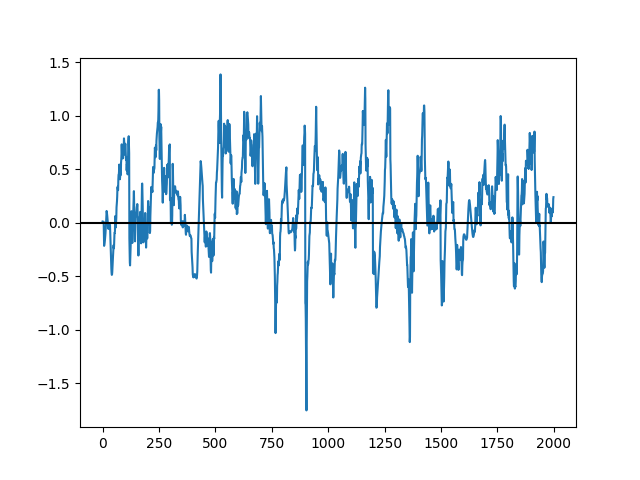

In [15]:
plt.figure()
plt.plot(df['i'], df['alignedvel'])
plt.axhline(0, color='k')


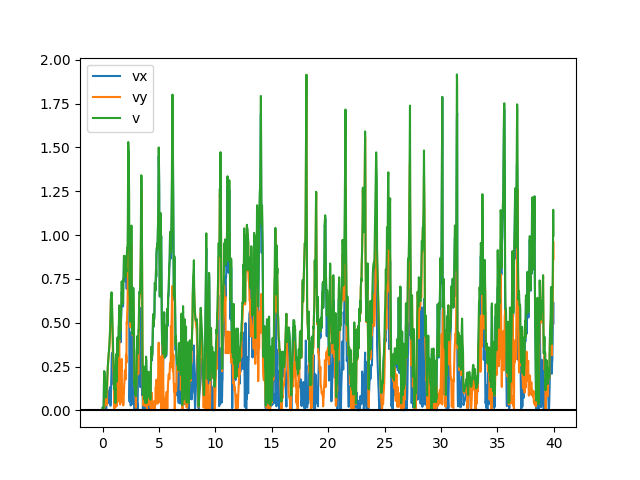

In [16]:
velnorm = np.linalg.norm(linvel, axis=1)
plt.figure()
plt.plot(df['i']*2/100., np.abs(linvel[:,0]), label='vx')
plt.plot(df['i']*2/100., np.abs(linvel[:,1]), label='vy')
plt.plot(df['i']*2/100., velnorm, label='v')
plt.axhline(0, color='k')
plt.legend()

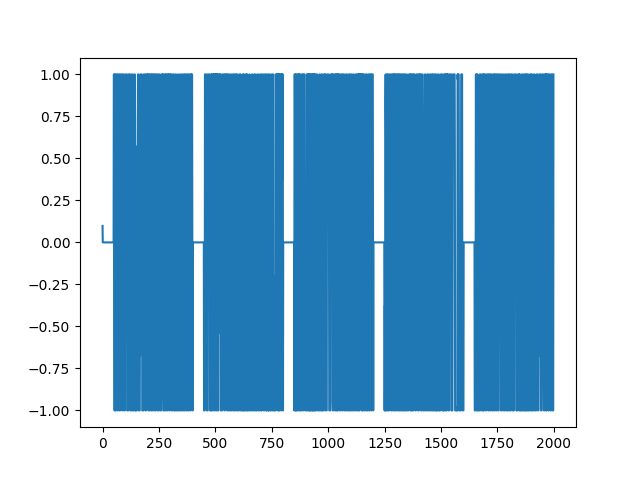

In [17]:
plt.figure()
plt.plot(df['i'], np.clip(df['action'], a_min=-1, a_max=1))